In [3]:
import os
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import preprocessing
from matplotlib import pyplot as plt
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn import svm,model_selection
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.preprocessing import Binarizer
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import VarianceThreshold,SelectFromModel
from sklearn.feature_selection import SelectKBest, f_classif, chi2

data = pd.read_csv("train_data.csv",sep=",")
test= pd.read_csv("test_data.csv",sep=",")
test_target= pd.read_csv("sample_submission.csv",sep=",")

data['Work load Average/day '] = [x.replace(',', '') for x in data['Work load Average/day ']]
data['Work load Average/day '] = data['Work load Average/day '].astype(int)

target=data['Absent']
data=data.drop(['Absent'],1)
test_target=test_target['Absent']
data=data.drop(['ID'],1)
test=test.drop(['ID'],1)

#selectkbest
selector = SelectKBest(chi2, k=2) #testar de 1 a 19
fit = selector.fit(data, target)
#features selection
cols = selector.get_support(indices=True)
cols_names = list(data.columns[cols])
data = data[cols_names]
test = test[cols_names]

## Random Forest Regressor 

In [4]:
#create a model Random forest using RandomForestRegressor
model_RFP = RandomForestRegressor(n_estimators = 500, random_state = 1).fit(data,target)

#predict for test data
predictions_RFP = model_RFP.predict(test)

#craete a dataframe for actual and predicted data
df_new_rfp_pred = pd.DataFrame({'actual':test_target,'predicted':predictions_RFP})
#print((df_new_rfp_pred['predicted']))
accuracy_score(df_new_rfp_pred['actual'],round(df_new_rfp_pred['predicted']))

0.8083333333333333

## K-Nearest Neighbors

### KFold

The optimal number of neighbors is 15


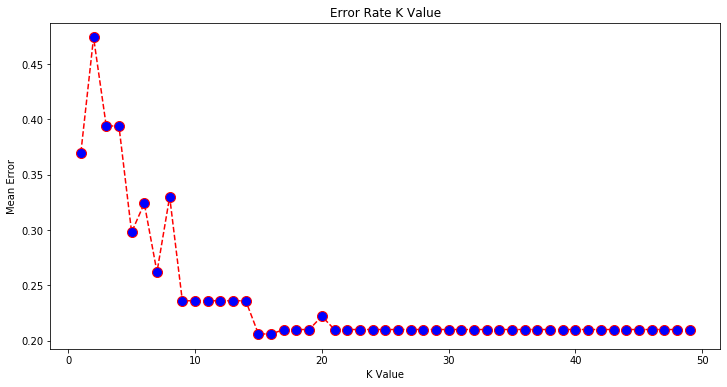

In [5]:
neighbors = list(range(1, 50))

cv_scores = []

# perform 5-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, data, target, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
mse = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.figure(figsize=(12, 6))
plt.plot(range(1, 50), mse, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

In [6]:
knn = KNeighborsClassifier(n_neighbors=15)
scores = cross_val_score(knn,data,target,cv=5)
scores.mean()

0.794

### Split 

The optimal number of neighbors is 2


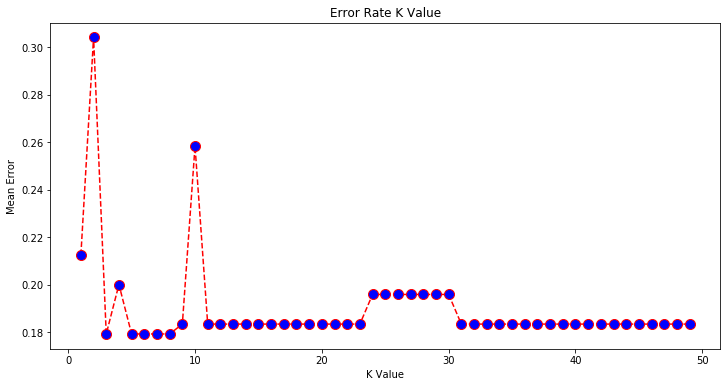

In [7]:
error = []

for k in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(data, target)
    pred_i = knn.predict(test)
    error.append(np.mean(pred_i != test_target))

# determining best k
optimal_k = error.index(min(error))
print("The optimal number of neighbors is {}".format(optimal_k))
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 50), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

In [8]:
model_DT = KNeighborsClassifier(n_neighbors=2).fit(data,target)

predictions_DT = model_DT.predict(test)

df_new_dt_pred_l = pd.DataFrame({'actual':test_target,'predicted':predictions_DT})

accuracy_score(df_new_dt_pred_l['actual'],round(df_new_dt_pred_l['predicted']))

0.6958333333333333

## Support Vector Machine

In [9]:
model_DT = svm.SVC(gamma="auto").fit(data,target)

predictions_DT = model_DT.predict(test)

df_new_dt_pred_l = pd.DataFrame({'actual':test_target,'predicted':predictions_DT})
accuracy_score(df_new_dt_pred_l['actual'],round(df_new_dt_pred_l['predicted']))

0.8166666666666667

## Logistic Regression 

In [10]:
model_DT = LogisticRegression(solver='lbfgs',max_iter=5000).fit(data,target)

predictions_DT = model_DT.predict(test)

df_new_dt_pred_l1 = pd.DataFrame({'actual':test_target,'predicted':predictions_DT})
#print(df_new_dt_pred_l['predicted'])
accuracy_score(df_new_dt_pred_l1['actual'],round(df_new_dt_pred_l1['predicted']))

0.8166666666666667

## Decision Tree Regressor 

In [11]:
model_DT = DecisionTreeRegressor(random_state = 1).fit(data,target)

predictions_DT = model_DT.predict(test)

df_new_dt_pred_l = pd.DataFrame({'actual':test_target,'predicted':predictions_DT})
accuracy_score(df_new_dt_pred_l['actual'],round(df_new_dt_pred_l['predicted']))

0.8083333333333333

## AdaBoost Classifier 

In [12]:
model_DT = AdaBoostClassifier().fit(data,target)

predictions_DT = model_DT.predict(test)

df_new_dt_pred_l = pd.DataFrame({'actual':test_target,'predicted':predictions_DT})
accuracy_score(df_new_dt_pred_l['actual'],round(df_new_dt_pred_l['predicted']))

0.8083333333333333

## Linear Regression

In [13]:
model_DT = LinearRegression().fit(data,target)

predictions_DT = model_DT.predict(test)
df_new_dt_pred_l = pd.DataFrame({'actual':test_target,'predicted':predictions_DT})
accuracy_score(df_new_dt_pred_l['actual'],round(df_new_dt_pred_l['predicted']))

0.8083333333333333

## Gaussian Naive Bayes 

In [14]:
model_DT = GaussianNB().fit(data,target)

predictions_DT = model_DT.predict(test)
df_new_dt_pred_l = pd.DataFrame({'actual':test_target,'predicted':predictions_DT})
accuracy_score(df_new_dt_pred_l['actual'],round(df_new_dt_pred_l['predicted']))

0.8166666666666667